# Compare MI of KO and WT

In [1]:
from typing import Tuple

import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

from param import *
from modules.utils.util import get_place_cell
from modules.utils.plot_utils import label_diff

output_dir = ParamDir().output_dir

In [2]:
mi_KO = []
mi_WT = []
for data_dir in ParamDir().data_list:
    data_name = str(data_dir).split('/')[-1]
    with open(output_dir/data_name/"MI_all.pickle","rb") as f:
        results_all = pickle.load(f)
    if "KO" in data_name:
        mi_KO.extend(results_all['original MI'])
    else:
        mi_WT.extend(results_all['original MI'])


In [3]:
stats.ttest_ind(mi_KO, mi_WT)

Ttest_indResult(statistic=-6.9724669967563795, pvalue=6.623438683403206e-12)

In [4]:
print(f"num of WT neurons: {len(mi_WT)}")
print(f"num of KO neurons: {len(mi_KO)}")

num of WT neurons: 501
num of KO neurons: 284


Text(0.5, 1.0, 'mutual information of each neuron')

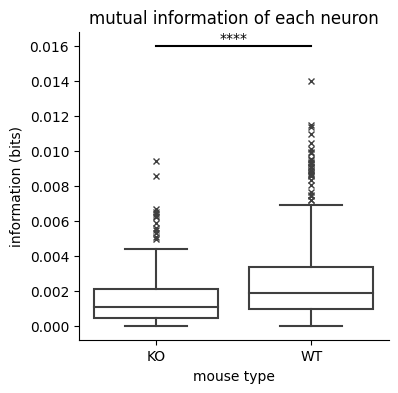

In [5]:
means = [np.mean(mi_KO), np.mean(mi_WT)]
errors = [np.max(mi_KO) - .002, np.max(mi_WT) - .002]

fig, ax = plt.subplots(figsize=(4,4))
sns.despine()

sns.boxplot([mi_KO, mi_WT],
            ax=ax,
            boxprops={"facecolor": (0, 0, 0, 0)},
            flierprops={"marker": "x"})
label_diff(0, 1, "****", ind=[0,1], Y=means, errors=errors, ax=ax, barh=.00001)

ax.set_xticklabels(["KO", "WT"])
ax.set_xlabel("mouse type")
ax.set_ylabel("information (bits)")
ax.set_title("mutual information of each neuron")


## Distribution

In [14]:
mi_list = []
mouse_type_list = []
for data_dir in ParamDir().data_list:
    data_name = str(data_dir).split('/')[-1]
    mouse_type = "KO" if "KO" in data_name else "WT"
    with open(output_dir/data_name/"MI_all.pickle","rb") as f:
        results_all = pickle.load(f)

    n_neuron = len(results_all['original MI'])
    mi_list.extend(results_all['original MI'])
    mouse_type_list.extend([f"{mouse_type}"] * n_neuron)
plot_df = pd.DataFrame(mi_list, columns=["mutual information"])
plot_df["mouse type"] = mouse_type_list

<Figure size 640x480 with 0 Axes>

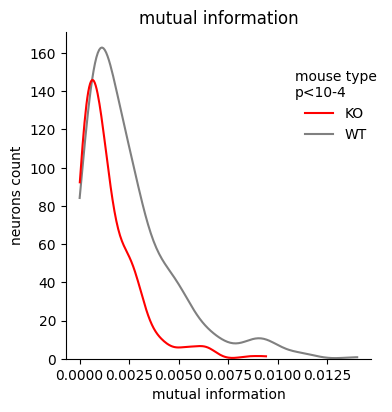

In [53]:
sns.despine()
plot = sns.displot(
    x="mutual information",
    hue="mouse type",
    kind="kde", 
    palette={"KO": "red", "WT": "grey"},
    data=plot_df,
    cut=0,
    height=4,
    aspect=1,
    )
# label_diff(0, 1, "****", ind=[0,1], Y=means, errors=errors, ax=ax, barh=.00001)

# ax.set_xticklabels(["KO", "WT"])
# plot.ax.set_xlabel("mouse type")
plot.ax.set_ylabel("neurons count")
plot.ax.set_title("mutual information")
sns.move_legend(plot, "upper right", bbox_to_anchor=(.8, .9), title="mouse type\np<10-4")
